<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# DSI-SG-42 Capstone Project:
### FeelFlow AI: Decoding Emotions, Advancing Patient Support

---

### **Background**

In Singapore, the urgency to address mental health issues among younger generations, particularly GenZ and millennials, is critical due to increasing pressures from work, school, and personal relationships leading to anxiety, depression, and substance abuse. Recognizing this, the Ministry of Health and AI Singapore (NUS) have initiated the "Mental Health with AI" Seminar to integrate AI technologies with clinical practices, enhancing therapeutic processes.

The aims of this study is to develop a real-time emotion predictor app. The objective is to alleviate the layer of assessing patients' emotional well-being, which is crucial in enabling a more accurate diagnosis and treatment from. The app is in its beta stages, but seeks to be presented at the seminar for. Further discussions to adoption and integration into pre-existing app/softwares can be opened during this seminar. 

### **Problem Statement**
##### *Where discerning people’s emotion can sometimes be an unnerving guessing game. How can clinicians use speech emotion recognition technology to accurately assess patients' emotional well-being, thereby improving diagnosis and treatment outcomes?*

## **6. Application**

In the event that Streamlit does not load, this will be used as the backup to run the demo live during the presentation

##### *Note: It is advisable to run this notebook on Python 3.8.19 or earlier.*

### Importing Libraries

In [3]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tempfile
import soundfile as sf
import os
from tensorflow.keras.models import load_model
import pickle
from sklearn.preprocessing import StandardScaler
import whisper

### **6.1 Whisper**

Recording for 15 seconds...
1/1 [==============================] - 0s 231ms/step


2024-05-10 09:59:41.646260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/amoz/.pyenv/versions/3.8.19/envs/myenv38/lib/python3.8/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Predicted Emotion: Happy
Emotion Probability: 27.78%
Transcription:  Hi, help me. I'm tired. Please help me right now. Hey, help me. Help me. Hello.


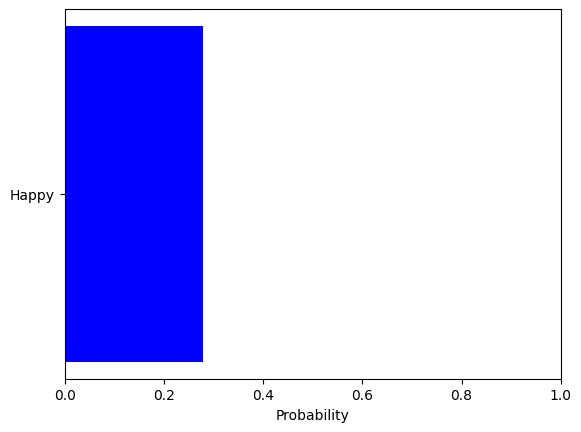

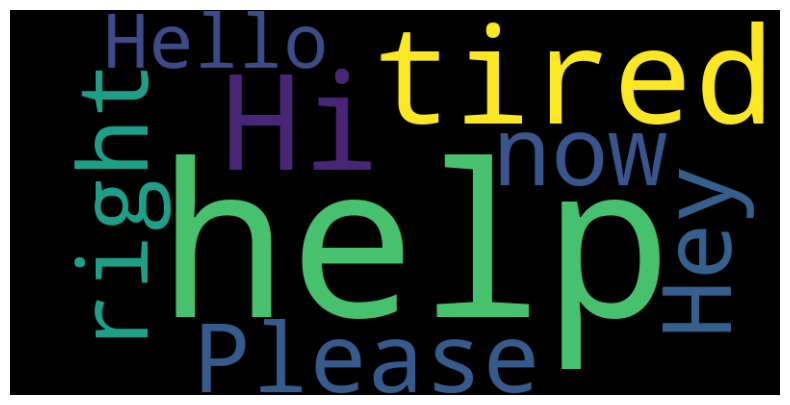

In [5]:
# Function to record audio
def record_audio(duration, sample_rate=16000):
    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  # Wait for the recording to finish
    return audio_data

# Function to extract features from audio data
def extract_features(audio_data):
    # Adjust the number of features to match the model's input requirements
    return np.random.rand(164)  # Dummy features, adjust this based on your actual feature extraction logic

# Load necessary files
model = load_model('../models/wavenet_model.h5')
encoder = pickle.load(open('../encoders/label_encoder.pkl', 'rb'))

# Initialize your scaler and fit with dummy features for demonstration
scaler = StandardScaler()
dummy_features = np.random.rand(10, 164)  # Adjust here to match the correct feature dimension
scaler.fit(dummy_features)  # Fit scaler to the dummy features

# Function to predict emotion with probability
def predict_emotion(audio_data, model, scaler, encoder):
    features = extract_features(audio_data)
    features_scaled = scaler.transform([features])
    features_reshaped = features_scaled.reshape(1, -1, 1)
    predictions = model.predict(features_reshaped)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = encoder.inverse_transform(predicted_class)
    prediction_probability = np.max(predictions, axis=1)
    return predicted_label[0], prediction_probability[0]

# Function to transcribe audio using OpenAI's Whisper
def transcribe_audio(audio_data):
    model = whisper.load_model("base")
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".wav")
    # Use soundfile to write the audio data to the file
    sf.write(temp_file.name, audio_data, 16000)
    result = model.transcribe(temp_file.name)
    os.unlink(temp_file.name)
    return result['text']

def main():
    duration = 15  # Duration for audio recording in seconds
    print(f"Recording for {duration} seconds...")
    audio_data = record_audio(duration)
    
    emotion_prediction, prediction_prob = predict_emotion(audio_data, model, scaler, encoder)
    transcription = transcribe_audio(audio_data)
    
    # Display results
    print(f"Predicted Emotion: {emotion_prediction}")
    print(f"Emotion Probability: {prediction_prob*100:.2f}%")
    print(f"Transcription: {transcription}")
    
    # Visualization: Emotion Probability Meter
    fig, ax = plt.subplots()
    ax.barh([emotion_prediction], [prediction_prob], color='blue')
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    plt.show()

    # Visualization: Real-Time Word Cloud
    wordcloud = WordCloud(width=800, height=400).generate(transcription)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    main()